In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import FinanceDataReader as fdr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings('ignore')

In [2]:
with open("../btc_usd_1d.pkl", "rb") as f:
    df = pickle.load(f)
df.reset_index(inplace=True)
df

,ot,o,h,l,c,v
0,2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06
1,2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06
2,2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06
3,2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06
4,2014-12-03,379.25,383.00,374.23,376.67,2.998358e+06
...,...,...,...,...,...,...
2609,2022-01-20,41733.21,43518.69,40554.14,40736.05,2.425153e+03
2610,2022-01-21,40654.72,41115.58,35423.00,36495.46,6.201046e+03
2611,2022-01-22,36447.37,36825.98,34000.00,35091.11,4.510372e+03
2612,2022-01-23,35084.79,36574.47,34624.59,36293.62,2.533704e+03


In [3]:
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df

,Date,Open,High,Low,Close,Volume
0,2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06
1,2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06
2,2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06
3,2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06
4,2014-12-03,379.25,383.00,374.23,376.67,2.998358e+06
...,...,...,...,...,...,...
2609,2022-01-20,41733.21,43518.69,40554.14,40736.05,2.425153e+03
2610,2022-01-21,40654.72,41115.58,35423.00,36495.46,6.201046e+03
2611,2022-01-22,36447.37,36825.98,34000.00,35091.11,4.510372e+03
2612,2022-01-23,35084.79,36574.47,34624.59,36293.62,2.533704e+03


In [4]:
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06
2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06
2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06
2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06
2014-12-03,379.25,383.00,374.23,376.67,2.998358e+06
...,...,...,...,...,...
2022-01-20,41733.21,43518.69,40554.14,40736.05,2.425153e+03
2022-01-21,40654.72,41115.58,35423.00,36495.46,6.201046e+03
2022-01-22,36447.37,36825.98,34000.00,35091.11,4.510372e+03


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2614 entries, 2014-11-29 to 2022-01-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2614 non-null   float64
 1   High    2614 non-null   float64
 2   Low     2614 non-null   float64
 3   Close   2614 non-null   float64
 4   Volume  2614 non-null   float64
dtypes: float64(5)
memory usage: 122.5 KB
None


In [6]:
start_date = '20150104'
end_date = '20211214'
DJI_df = fdr.DataReader('dji', start_date, end_date).reset_index()
DJI_df

,Date,Close,Open,High,Low,Volume,Change
0,2015-01-05,17501.65,17821.30,17821.30,17475.93,116160000.0,-0.0186
1,2015-01-06,17371.64,17504.18,17581.05,17262.37,101870000.0,-0.0074
2,2015-01-07,17584.52,17374.78,17597.08,17374.78,91030000.0,0.0123
3,2015-01-08,17907.87,17591.97,17916.04,17591.97,114890000.0,0.0184
4,2015-01-09,17737.37,17911.02,17915.32,17686.09,93390000.0,-0.0095
...,...,...,...,...,...,...,...
1745,2021-12-08,35754.75,35716.85,35840.52,35602.65,387650000.0,0.0010
1746,2021-12-09,35754.69,35722.26,35864.24,35577.14,353020000.0,-0.0000
1747,2021-12-10,35970.99,35830.55,35982.69,35710.43,361200000.0,0.0060
1748,2021-12-13,35650.95,35958.93,35958.93,35609.53,451590000.0,-0.0089


In [7]:
EXC = fdr.DataReader('USD/KRW', start_date, end_date).reset_index()
EXC

,Date,Close,Open,High,Low,Change
0,2015-01-05,1109.93,1106.90,1112.60,1105.16,0.0027
1,2015-01-06,1099.00,1109.93,1110.20,1096.75,-0.0098
2,2015-01-07,1098.74,1099.00,1103.95,1095.10,-0.0002
3,2015-01-08,1095.51,1098.74,1102.00,1094.89,-0.0029
4,2015-01-09,1085.82,1095.51,1097.10,1085.32,-0.0088
...,...,...,...,...,...,...
1807,2021-12-08,1175.19,1176.85,1179.31,1175.12,-0.0013
1808,2021-12-09,1178.15,1173.42,1179.37,1172.62,0.0025
1809,2021-12-10,1180.86,1178.27,1182.82,1176.40,0.0023
1810,2021-12-13,1184.91,1180.96,1186.16,1177.03,0.0034


In [209]:
#df.ta.log_return(cumulative=True, append=True)
#df.ta.percent_return(cumulative=True, append=True)
#df.columns

In [9]:
df.ta.strategy()

0it [00:00, ?it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

/opt/anaconda3/envs/capstone/lib/python3.8/multiprocessing/pool.py:48: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return list(map(*args))
131it [00:03, 34.03it/s]


In [8]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-11-29,376.42,386.60,372.25,376.72,2746157.05
2014-11-30,376.57,381.99,373.32,373.34,1145566.61
2014-12-01,376.40,382.31,373.03,378.39,2520662.37
2014-12-02,378.39,382.86,375.23,379.25,2593576.46
2014-12-03,379.25,383.00,374.23,376.67,2998357.92


In [10]:
predict_df = df.drop(['Open','Close'],axis=1)
predict_df

,High,Low,Volume,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,...,VIDYA_14,VTXP_14,VTXM_14,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,ZS_30
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-29,386.60,372.25,2.746157e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,378.523333,NaN,378.0725,NaN,NaN,NaN,NaN
2014-11-30,381.99,373.32,1.145567e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,376.216667,NaN,375.4975,NaN,NaN,NaN,NaN
2014-12-01,382.31,373.03,2.520662e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,377.910000,NaN,378.0300,NaN,NaN,NaN,NaN
2014-12-02,382.86,375.23,2.593576e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,379.113333,NaN,379.1475,NaN,NaN,NaN,NaN
2014-12-03,383.00,374.23,2.998358e+06,377.946000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,377.966667,NaN,377.6425,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20,43518.69,40554.14,2.425153e+03,42189.584000,44234.796155,40144.371845,2045.212155,38639.642871,43323.6910,48317.385371,...,46026.624556,0.928271,1.010188,41602.960000,42490.807716,41386.2325,-75.960871,42221.791818,41458.269479,-1.340790
2022-01-21,41115.58,35423.00,6.201046e+03,41110.634000,43399.004011,38822.263989,2288.370011,37746.692880,42759.5930,48407.310380,...,45455.421513,0.822013,1.069440,37678.013333,40620.957414,37382.3750,-88.127758,41119.053091,39508.738664,-2.290136
2022-01-22,36825.98,34000.00,4.510372e+03,39702.070667,42026.281344,37377.859989,2324.210677,36973.404537,42146.6375,48008.267037,...,44723.631421,0.783588,1.182284,35305.696667,39124.719066,35252.0500,-89.565087,39874.442364,37380.753453,-2.382943


In [11]:
# def gen_train_test(df):
#     df['y_true'] = 0
#     for i in range(len(df) - 1):
#         df['y_true'].iloc[i] = df['High'].iloc[i+1]

# gen_train_test(predict_df)

predict_df['y_true'] = predict_df['High'].shift(-1) # 위 함수와 같은 동작수행
predict_df

,High,Low,Volume,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,...,VTXP_14,VTXM_14,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,ZS_30,y_true
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-29,386.60,372.25,2.746157e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,378.523333,NaN,378.0725,NaN,NaN,NaN,NaN,381.99
2014-11-30,381.99,373.32,1.145567e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,376.216667,NaN,375.4975,NaN,NaN,NaN,NaN,382.31
2014-12-01,382.31,373.03,2.520662e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,377.910000,NaN,378.0300,NaN,NaN,NaN,NaN,382.86
2014-12-02,382.86,375.23,2.593576e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,379.113333,NaN,379.1475,NaN,NaN,NaN,NaN,383.00
2014-12-03,383.00,374.23,2.998358e+06,377.946000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,377.966667,NaN,377.6425,NaN,NaN,NaN,NaN,378.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20,43518.69,40554.14,2.425153e+03,42189.584000,44234.796155,40144.371845,2045.212155,38639.642871,43323.6910,48317.385371,...,0.928271,1.010188,41602.960000,42490.807716,41386.2325,-75.960871,42221.791818,41458.269479,-1.340790,41115.58
2022-01-21,41115.58,35423.00,6.201046e+03,41110.634000,43399.004011,38822.263989,2288.370011,37746.692880,42759.5930,48407.310380,...,0.822013,1.069440,37678.013333,40620.957414,37382.3750,-88.127758,41119.053091,39508.738664,-2.290136,36825.98
2022-01-22,36825.98,34000.00,4.510372e+03,39702.070667,42026.281344,37377.859989,2324.210677,36973.404537,42146.6375,48008.267037,...,0.783588,1.182284,35305.696667,39124.719066,35252.0500,-89.565087,39874.442364,37380.753453,-2.382943,36574.47


In [12]:
predict_df = predict_df[:-1]

In [13]:
predict_df2 = predict_df.dropna(axis=1, how='any')
predict_df2

,High,Low,Volume,AD,AMATe_LR_8_21_2,AMATe_SR_8_21_2,OBV,AOBV_LR_2,AOBV_SR_2,BOP,...,TOS_STDEVALL_LR,TOS_STDEVALL_L_1,TOS_STDEVALL_U_1,TOS_STDEVALL_L_2,TOS_STDEVALL_U_2,TOS_STDEVALL_L_3,TOS_STDEVALL_U_3,TTM_TRND_6,WCP,y_true
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-29,386.60,372.25,2.746157e+06,-1.035311e+06,0,0,2.746157e+06,0,0,0.020906,...,-9678.166369,-25721.233130,6364.900391,-41764.299891,22407.967152,-57807.366652,38451.033913,-1,378.0725,381.99
2014-11-30,381.99,373.32,1.145567e+06,-2.175592e+06,0,0,1.600590e+06,0,0,-0.372549,...,-9662.093762,-25705.160523,6380.972999,-41748.227284,22424.039760,-57791.294045,38467.106521,-1,375.4975,382.31
2014-12-01,382.31,373.03,2.520662e+06,-1.784455e+06,0,0,4.121253e+06,0,0,0.214440,...,-9646.021155,-25689.087916,6397.045606,-41732.154677,22440.112367,-57775.221437,38483.179128,-1,378.0300,382.86
2014-12-02,382.86,375.23,2.593576e+06,-1.645088e+06,0,0,6.714829e+06,0,0,0.112713,...,-9629.948547,-25673.015308,6413.118213,-41716.082069,22456.184974,-57759.148830,38499.251735,-1,379.1475,383.00
2014-12-03,383.00,374.23,2.998358e+06,-2.975033e+06,0,0,3.716471e+06,0,0,-0.294185,...,-9613.875940,-25656.942701,6429.190821,-41700.009462,22472.257582,-57743.076223,38515.324343,-1,377.6425,378.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,42589.90,41145.23,1.664704e+03,5.395340e+09,0,1,-3.355414e+08,1,0,-0.481093,...,32239.193570,16196.126809,48282.260331,153.060048,64325.327092,-15890.006713,80368.393853,-1,41775.3875,43518.69
2022-01-20,43518.69,40554.14,2.425153e+03,5.395338e+09,0,1,-3.355438e+08,0,1,-0.336361,...,32255.266177,16212.199416,48298.332938,169.132656,64341.399699,-15873.934105,80384.466460,-1,41386.2325,41115.58
2022-01-21,41115.58,35423.00,6.201046e+03,5.395334e+09,0,1,-3.355500e+08,0,1,-0.730646,...,32271.338785,16228.272024,48314.405545,185.205263,64357.472306,-15857.861498,80400.539067,-1,37382.3750,36825.98


In [14]:
col_dict = {}
col_dict = predict_df2.columns
col_dict

Index(['High', 'Low', 'Volume', 'AD', 'AMATe_LR_8_21_2', 'AMATe_SR_8_21_2',
       'OBV', 'AOBV_LR_2', 'AOBV_SR_2', 'BOP', 'CDL_DOJI_10_0.1', 'CDL_INSIDE',
       'LDECAY_5', 'DEC_1', 'HA_open', 'HA_high', 'HA_low', 'HA_close', 'HL2',
       'HLC3', 'HWM', 'HWU', 'HWL', 'HWMA_0.2_0.1_0.1', 'INC_1', 'MCGD_10',
       'NVI_1', 'OHLC4', 'PSARaf_0.02_0.2', 'PSARr_0.02_0.2', 'PVI_1', 'PVOL',
       'PVR', 'SQZ_ON', 'SQZ_OFF', 'SQZ_NO', 'SQZPRO_ON_WIDE',
       'SQZPRO_ON_NORMAL', 'SQZPRO_ON_NARROW', 'SQZPRO_OFF', 'SQZPRO_NO',
       'SSF_10_2', 'STC_10_12_26_0.5', 'STCstoch_10_12_26_0.5',
       'SUPERTd_7_3.0', 'THERMOl_20_2_0.5', 'THERMOs_20_2_0.5',
       'TOS_STDEVALL_LR', 'TOS_STDEVALL_L_1', 'TOS_STDEVALL_U_1',
       'TOS_STDEVALL_L_2', 'TOS_STDEVALL_U_2', 'TOS_STDEVALL_L_3',
       'TOS_STDEVALL_U_3', 'TTM_TRND_6', 'WCP', 'y_true'],
      dtype='object')

In [15]:
minmax_scaler = MinMaxScaler()
minmax_scaled_predict = minmax_scaler.fit_transform(predict_df2)
minmax_scaled_predict_df = pd.DataFrame(minmax_scaled_predict)
minmax_scaled_predict_df.columns = col_dict
minmax_scaled_predict_df

,High,Low,Volume,AD,AMATe_LR_8_21_2,AMATe_SR_8_21_2,OBV,AOBV_LR_2,AOBV_SR_2,BOP,...,TOS_STDEVALL_LR,TOS_STDEVALL_L_1,TOS_STDEVALL_U_1,TOS_STDEVALL_L_2,TOS_STDEVALL_U_2,TOS_STDEVALL_L_3,TOS_STDEVALL_U_3,TTM_TRND_6,WCP,y_true
0,0.002526,0.003326,0.003556,0.008370,0.0,0.0,0.256727,0.0,0.0,0.510210,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.003004,0.002459
1,0.002459,0.003342,0.001483,0.008169,0.0,0.0,0.256490,0.0,0.0,0.313385,...,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383,0.0,0.002965,0.002464
2,0.002464,0.003338,0.003264,0.008238,0.0,0.0,0.257013,0.0,0.0,0.607025,...,0.000766,0.000766,0.000766,0.000766,0.000766,0.000766,0.000766,0.0,0.003003,0.002472
3,0.002472,0.003371,0.003358,0.008263,0.0,0.0,0.257551,0.0,0.0,0.556136,...,0.001149,0.001149,0.001149,0.001149,0.001149,0.001149,0.001149,0.0,0.003020,0.002474
4,0.002474,0.003356,0.003882,0.008029,0.0,0.0,0.256929,0.0,0.0,0.352587,...,0.001531,0.001531,0.001531,0.001531,0.001531,0.001531,0.001531,0.0,0.002997,0.002415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,0.616061,0.620186,0.000002,0.955715,0.0,1.0,0.186493,1.0,0.0,0.259086,...,0.998469,0.998469,0.998469,0.998469,0.998469,0.998469,0.998469,0.0,0.620877,0.629563
2609,0.629563,0.611244,0.000003,0.955715,0.0,1.0,0.186493,0.0,1.0,0.331488,...,0.998851,0.998851,0.998851,0.998851,0.998851,0.998851,0.998851,0.0,0.615069,0.594628
2610,0.594628,0.533614,0.000008,0.955714,0.0,1.0,0.186492,0.0,1.0,0.134248,...,0.999234,0.999234,0.999234,0.999234,0.999234,0.999234,0.999234,0.0,0.555310,0.532267
2611,0.532267,0.512085,0.000006,0.955714,0.0,1.0,0.186491,0.0,1.0,0.259670,...,0.999617,0.999617,0.999617,0.999617,0.999617,0.999617,0.999617,0.0,0.523514,0.528611


In [16]:
minmax_scaled_predict_df.reset_index(drop=True,inplace=True)
train_df = minmax_scaled_predict_df.iloc[29:2550]
test_df = minmax_scaled_predict_df.iloc[2550:2613]

In [17]:
train_df

,High,Low,Volume,AD,AMATe_LR_8_21_2,AMATe_SR_8_21_2,OBV,AOBV_LR_2,AOBV_SR_2,BOP,...,TOS_STDEVALL_LR,TOS_STDEVALL_L_1,TOS_STDEVALL_U_1,TOS_STDEVALL_L_2,TOS_STDEVALL_U_2,TOS_STDEVALL_L_3,TOS_STDEVALL_U_3,TTM_TRND_6,WCP,y_true
29,0.001551,0.002403,0.001669,0.006582,0.0,1.0,0.254807,0.0,1.0,0.544138,...,0.011103,0.011103,0.011103,0.011103,0.011103,0.011103,0.011103,0.0,0.002077,0.001560
30,0.001560,0.002409,0.002408,0.006498,0.0,1.0,0.254421,0.0,1.0,0.391257,...,0.011485,0.011485,0.011485,0.011485,0.011485,0.011485,0.011485,0.0,0.002067,0.001511
31,0.001511,0.002384,0.004003,0.006266,0.0,1.0,0.253779,0.0,1.0,0.289899,...,0.011868,0.011868,0.011868,0.011868,0.011868,0.011868,0.011868,0.0,0.002027,0.001558
32,0.001558,0.002395,0.002493,0.006550,0.0,1.0,0.254179,0.0,1.0,0.892535,...,0.012251,0.012251,0.012251,0.012251,0.012251,0.012251,0.012251,1.0,0.002097,0.001572
33,0.001572,0.002424,0.001319,0.006529,0.0,1.0,0.253968,0.0,1.0,0.324665,...,0.012634,0.012634,0.012634,0.012634,0.012634,0.012634,0.012634,0.0,0.002086,0.001514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,0.882078,0.881236,0.000005,0.955716,0.0,1.0,0.186499,0.0,1.0,0.551723,...,0.974349,0.974349,0.974349,0.974349,0.974349,0.974349,0.974349,0.0,0.893022,0.883385
2546,0.883385,0.852740,0.000008,0.955715,0.0,1.0,0.186498,0.0,1.0,0.111918,...,0.974732,0.974732,0.974732,0.974732,0.974732,0.974732,0.974732,0.0,0.860538,0.845931
2547,0.845931,0.839480,0.000004,0.955715,0.0,1.0,0.186498,0.0,1.0,0.717744,...,0.975115,0.975115,0.975115,0.975115,0.975115,0.975115,0.975115,0.0,0.856691,0.867658
2548,0.867658,0.866474,0.000002,0.955716,0.0,1.0,0.186499,1.0,0.0,0.832016,...,0.975498,0.975498,0.975498,0.975498,0.975498,0.975498,0.975498,0.0,0.881164,0.870478


In [18]:
X_train = train_df.drop(['High', 'y_true'], axis=1,inplace=False)
y_train = train_df['y_true']

X_test=test_df.drop(['High', 'y_true'], axis=1,inplace=False)
y_test=test_df['y_true']

In [19]:
print(X_train.shape)
print(X_test.shape)

(2521, 55)
(63, 55)


In [20]:
model = LinearRegression()
LR = model.fit(X_train, y_train)

In [21]:
y_pred = model.predict(X_test)

Feature: 0, Score: 0.21743
Feature: 1, Score: 0.00894
Feature: 2, Score: -0.00375
Feature: 3, Score: -0.00043
Feature: 4, Score: 0.00043
Feature: 5, Score: -0.00039
Feature: 6, Score: 0.00043
Feature: 7, Score: -0.00043
Feature: 8, Score: 0.00147
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00007
Feature: 11, Score: 0.09055
Feature: 12, Score: -0.00037
Feature: 13, Score: 0.24591
Feature: 14, Score: 0.19964
Feature: 15, Score: -0.14075
Feature: 16, Score: 0.17487
Feature: 17, Score: -1.65928
Feature: 18, Score: 0.46511
Feature: 19, Score: -0.00464
Feature: 20, Score: 0.05683
Feature: 21, Score: -0.07295
Feature: 22, Score: -0.00464
Feature: 23, Score: -0.00086
Feature: 24, Score: -0.03095
Feature: 25, Score: 0.00800
Feature: 26, Score: 0.17487
Feature: 27, Score: 0.00061
Feature: 28, Score: -0.00015
Feature: 29, Score: -0.00178
Feature: 30, Score: -0.00658
Feature: 31, Score: 0.00065
Feature: 32, Score: -0.00029
Feature: 33, Score: 0.00029
Feature: 34, Score: -0.00000
Feature: 35, 

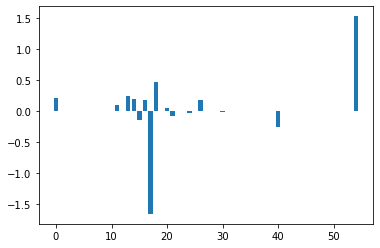

In [22]:
importance = model.coef_
for i,v in enumerate(importance):
    	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

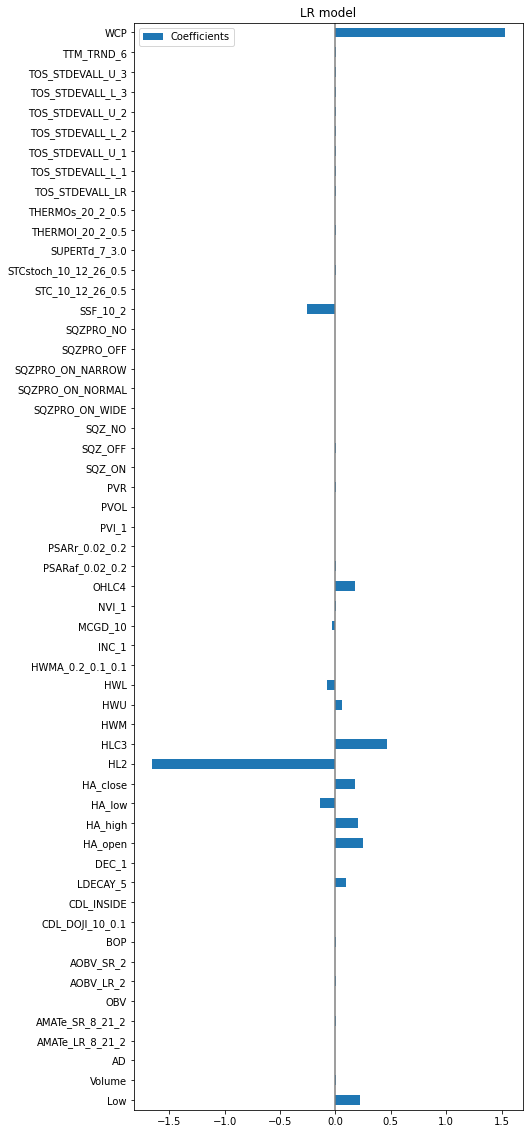

In [23]:
coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(9, 20))
plt.title('LR model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [33]:
y_test.index = pd.RangeIndex(start=0, stop=len(y_test), step=1)

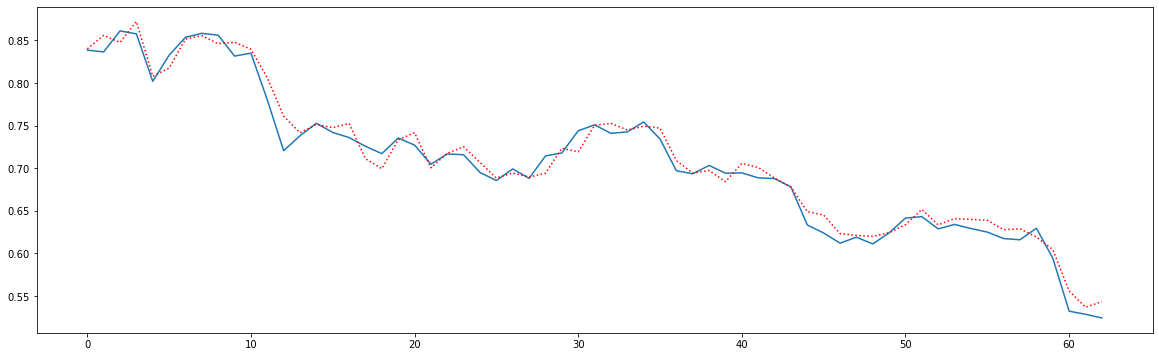

In [35]:
plt.figure(figsize=(20, 6))
plt.plot(y_test)
plt.plot(y_pred, color='red', linestyle=":")

In [36]:
mean_squared_error(y_test, y_pred)

0.00015708497909868127

In [39]:
X_test

,Low,Volume,AD,AMATe_LR_8_21_2,AMATe_SR_8_21_2,OBV,AOBV_LR_2,AOBV_SR_2,BOP,CDL_DOJI_10_0.1,...,THERMOs_20_2_0.5,TOS_STDEVALL_LR,TOS_STDEVALL_L_1,TOS_STDEVALL_U_1,TOS_STDEVALL_L_2,TOS_STDEVALL_U_2,TOS_STDEVALL_L_3,TOS_STDEVALL_U_3,TTM_TRND_6,WCP
2550,0.839307,0.000004,0.955715,0.0,1.0,0.186498,0.0,1.0,0.192883,0.0,...,1.0,0.976263,0.976263,0.976263,0.976263,0.976263,0.976263,0.976263,0.0,0.847118
2551,0.831743,0.000004,0.955716,0.0,1.0,0.186499,0.0,1.0,0.733927,0.0,...,1.0,0.976646,0.976646,0.976646,0.976646,0.976646,0.976646,0.976646,0.0,0.848806
2552,0.843332,0.000002,0.955716,0.0,1.0,0.186498,0.0,1.0,0.392226,0.0,...,0.0,0.977029,0.977029,0.977029,0.977029,0.977029,0.977029,0.977029,0.0,0.848167
2553,0.860727,0.000002,0.955716,0.0,1.0,0.186498,0.0,1.0,0.879142,0.0,...,1.0,0.977412,0.977412,0.977412,0.977412,0.977412,0.977412,0.977412,1.0,0.872254
2554,0.807467,0.000007,0.955715,0.0,1.0,0.186497,0.0,1.0,0.040680,0.0,...,1.0,0.977795,0.977795,0.977795,0.977795,0.977795,0.977795,0.977795,0.0,0.819418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,0.620186,0.000002,0.955715,0.0,1.0,0.186493,1.0,0.0,0.259086,0.0,...,0.0,0.998469,0.998469,0.998469,0.998469,0.998469,0.998469,0.998469,0.0,0.620877
2609,0.611244,0.000003,0.955715,0.0,1.0,0.186493,0.0,1.0,0.331488,0.0,...,1.0,0.998851,0.998851,0.998851,0.998851,0.998851,0.998851,0.998851,0.0,0.615069
2610,0.533614,0.000008,0.955714,0.0,1.0,0.186492,0.0,1.0,0.134248,0.0,...,1.0,0.999234,0.999234,0.999234,0.999234,0.999234,0.999234,0.999234,0.0,0.555310
2611,0.512085,0.000006,0.955714,0.0,1.0,0.186491,0.0,1.0,0.259670,0.0,...,1.0,0.999617,0.999617,0.999617,0.999617,0.999617,0.999617,0.999617,0.0,0.523514


In [40]:
LR.predict(X_test)

array([0.8400176 , 0.85590628, 0.84755222, 0.87219084, 0.80786137,
       0.81743515, 0.8514853 , 0.8555884 , 0.84610286, 0.84782804,
       0.83948499, 0.80616805, 0.76108508, 0.74166052, 0.75129545,
       0.74761518, 0.75247797, 0.71114285, 0.6994362 , 0.73340098,
       0.74167549, 0.70045213, 0.71748814, 0.72517199, 0.7067362 ,
       0.68850881, 0.69437841, 0.68962792, 0.69408143, 0.72350198,
       0.71924927, 0.75024278, 0.75261562, 0.74482309, 0.74930788,
       0.74698092, 0.70881613, 0.69431018, 0.6973447 , 0.68416603,
       0.70564891, 0.70085492, 0.68842021, 0.67778326, 0.64902913,
       0.64497833, 0.62339502, 0.62117889, 0.62000249, 0.6242725 ,
       0.63378585, 0.65160886, 0.6335747 , 0.64090423, 0.6399287 ,
       0.6388702 , 0.6279038 , 0.62887614, 0.61933109, 0.6045535 ,
       0.55605657, 0.53691355, 0.54337648])

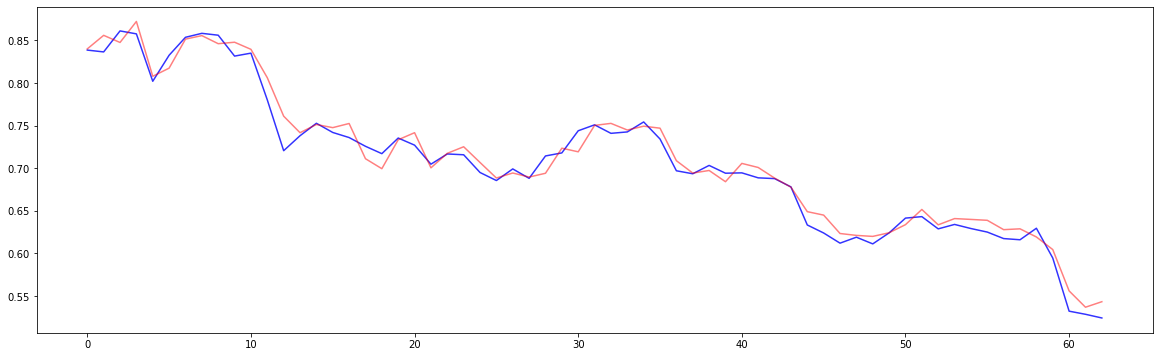

In [38]:
plt.figure(figsize=(20, 6))
plt.plot(pd.Series(y_test), alpha=0.8, color='b') # blue
plt.plot(pd.Series(LR.predict(X_test)), alpha=0.5, color='r') # green
plt.show()
